In [51]:
_=!git clone https://github.com/Sht97/Accelerometer-Gyro-dataset.git dataset
!cd dataset && git pull

Already up to date.


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split

In [53]:
def get_conv_model_A(num_classes,num_filtros,size_filtros, compile=True):
    
    #print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(300,6), name="input_1")
    layers = tf.keras.layers.Conv1D(num_filtros,size_filtros, activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    if compile:
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model


def train(model, batch_size, epochs, model_name=""):
    model.reset_states()
    h = model.fit(x_train, y_train, epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test),verbose=0)
    #metrics = model.evaluate(x_test, y_test)
    return h #{k:v for k,v in zip (model.metrics_names, metrics)}

In [54]:
archivos  = ['Daniel/Activacion','Daniel/Complejo','Daniel/Encender','Daniel/X'
             ,'Raul/Activacion','Raul/Complejo','Raul/Encender','Raul/X']
archivos2 = ['Daniel/Encender','Raul/Encender','Daniel/Complejo','Raul/Complejo','Daniel/X','Raul/X']

 
G0 = ['Daniel/Activacion','Raul/Activacion']  # 3
G1 = ['Daniel/Encender','Raul/Encender']    # 0 
G2 = ['Daniel/Complejo','Raul/Complejo']    # 2
G3 = ['Daniel/X','Raul/X']           # 1

x = []
y = []
for archivo in archivos2:

  df1=pd.read_csv('dataset/'+ archivo +'.csv')

  cambios=df1[df1['Tiempo']=='Order'].index.tolist()

  for i in cambios:
    gesto1=df1[(df1.index>=i-300)&(df1.index<i)].astype(int)
    gesto1 = gesto1.to_numpy()

    m=np.fft.rfft(gesto1[:,2:8],axis=0)
    f=25
    ones=np.ones(f)
    zeros=np.zeros(m.shape[0]-f)
    c=np.concatenate((ones,zeros))
    clean=m*c.reshape(m.shape[0],1)
    m=np.fft.irfft(clean,axis=0)
    x.append(m)

    #x.append(gesto1[:,2:8])

    if archivo in G0:
      y.append(3)
    elif archivo in G1:
      y.append(0)
    elif archivo in G2:
      y.append(2)
    else:
      y.append(1)



x = np.array(x)
y = np.array(y)

#x = (x+32762)/65536

x_train,x_test,y_train,y_test =  train_test_split(x,y)


print(x_train.shape)
print(y_train)

(464, 300, 6)
[2 1 1 0 1 1 1 0 1 1 2 1 2 1 1 2 2 2 2 0 2 0 1 1 2 1 0 0 0 1 2 1 0 1 0 2 2
 0 0 2 0 2 1 2 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 2 2 2 1 0 2 1 1 2 1 0 0 1
 0 2 2 1 1 0 1 2 1 2 2 2 0 2 1 2 0 0 2 2 2 2 2 0 2 2 0 0 1 1 1 2 1 0 0 1 1
 2 1 2 0 2 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 1 0 0 1 1 1 1 1 1 2 1 2 0 2 0 2 0
 1 2 0 1 0 1 2 1 0 0 2 0 1 2 0 0 0 2 1 1 2 0 2 1 1 1 1 0 0 1 2 2 2 2 0 0 0
 1 0 0 0 0 0 1 0 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 2 1 1 1 2 2 1 2 1 0 1 1 0 1
 1 0 2 2 2 1 0 0 1 1 1 1 0 0 2 1 2 0 2 0 2 0 2 0 1 1 2 2 2 1 0 1 2 2 1 1 0
 2 0 2 2 2 0 0 2 0 0 1 0 0 1 2 0 2 2 2 2 2 1 0 0 2 2 2 2 2 0 1 0 1 2 1 2 1
 0 1 0 1 2 2 0 2 1 1 2 1 2 0 2 0 1 2 2 0 2 0 1 0 2 1 2 2 1 1 0 2 1 1 1 0 0
 1 1 0 1 0 2 0 2 0 1 1 1 2 1 0 0 2 0 1 0 0 2 2 1 2 2 1 2 1 2 0 2 1 2 1 0 1
 1 2 0 2 0 1 2 0 1 0 1 0 1 2 2 0 1 2 0 2 1 2 0 2 1 1 1 2 0 2 0 2 0 1 0 1 1
 0 2 2 0 2 2 0 0 1 0 1 1 0 1 1 1 2 0 2 0 2 2 2 1 0 1 0 1 1 0 1 0 0 2 2 1 2
 0 2 0 0 2 0 1 0 1 0 0 0 1 1 2 2 0 1 0 0]


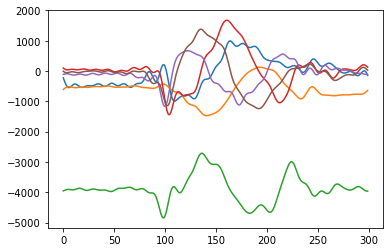

In [55]:
plt.plot(x[4])
plt.show()

In [57]:
model = get_conv_model_A(3,5,5)
a = train(model, batch_size=300, epochs=30, model_name="model_A")

In [58]:
metrics = model.evaluate(x_train, y_train,verbose=0)
print(metrics)


[35.42573928833008, 0.8965517282485962]


In [59]:
print(a.history['loss'][-1])
print(a.history['accuracy'][-1])
print(a.history['val_loss'][-1])
print(a.history['val_accuracy'][-1])

112.85294342041016
0.806034505367279
49.18429183959961
0.8645161390304565


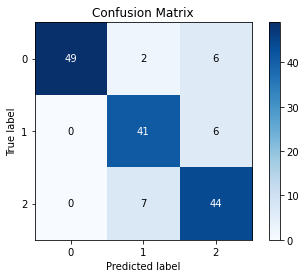

In [60]:
test_preds = model.predict(x_test).argmax(axis=1)
plot_confusion_matrix(y_test, test_preds, normalize=False)

In [61]:
datos = {'numFilter': [],
        'sizeFilter': [],
        'epochs': [],
        '#': [],
        'ErrTrain': [],
        'AccTrain': [],
        'ErrVal': [],
        'AccVal': []
        }

datos = pd.DataFrame(datos, columns = ['numFilter','sizeFilter','epochs','#','ErrTrain','AccTrain','ErrVal','AccVal'])

for i in [10,20,30,40,50]:
    print(i)
    for j in [10,50,100,150,200,250,300]:
        print(j)
        for k in [30,50]:
            print(k)
            for l in range(3):
                model = get_conv_model_A(3,i,j+1)
                a = train(model, batch_size=300, epochs=k, model_name="model_A")
                fila = {'numFilter': [i],
                        'sizeFilter': [j+1],
                        'epochs': [k],
                        '#': [l],
                        'ErrTrain': [a.history['loss'][-1]],
                        'AccTrain': [a.history['accuracy'][-1]],
                        'ErrVal': [a.history['val_loss'][-1]],
                        'AccVal': [a.history['val_accuracy'][-1]]
                        }

                fila = pd.DataFrame(fila, columns = ['numFilter','sizeFilter','epochs','#','ErrTrain','AccTrain','ErrVal','AccVal'])
                datos = datos.append(fila,ignore_index=True)
                

10
10
30
50
100
30
30
50
100
60
30
50
100
70
30
50
100
100
30
50
100
130
30
50
100
150
30
50
100
180
30
50
100
200
30
50
100
240
30
50
100
270
30
50
100
300
30
50
100


KeyboardInterrupt: 

In [62]:
print(datos)

     numFilter  sizeFilter  epochs    #   ErrTrain  AccTrain     ErrVal  \
0         10.0        11.0    30.0  0.0  11.468949  0.905172  13.699908   
1         10.0        11.0    30.0  1.0   3.456033  0.855603  12.381430   
2         10.0        11.0    30.0  2.0  44.971165  0.808190  23.758781   
3         10.0        11.0    50.0  0.0   1.747081  0.760776  17.529167   
4         10.0        11.0    50.0  1.0   1.168860  0.840517  12.412465   
..         ...         ...     ...  ...        ...       ...        ...   
100       10.0       301.0    30.0  1.0   2.656368  0.967672   9.529788   
101       10.0       301.0    30.0  2.0   0.655610  0.730603   7.029416   
102       10.0       301.0    50.0  0.0   1.672668  0.952586  16.056709   
103       10.0       301.0    50.0  1.0   1.205366  0.978448   2.141129   
104       10.0       301.0    50.0  2.0   0.420601  0.786638   6.190621   

       AccVal  
0    0.941935  
1    0.883871  
2    0.890323  
3    0.793548  
4    0.858065  
.. 